#### TODO
- Continous integraion of latest data using https://github.com/swar/nba_api/blob/master/docs/examples/Finding%20Games.ipynb
- Create 3 categories only that will be used for predictions.
- Calculate TS% that will be used also for feature enginnering
- Usage Rate (USG%): This metric estimates the percentage of team plays used by a player while he is on the floor. It can be calculated using field goal attempts, free throw attempts, and turnovers in relation to the team's total attempts.

- Assist to Turnover Ratio: A simple yet effective metric showing a player's ball-handling efficiency. It's calculated by dividing the total number of assists by the number of turnovers.

- Rebounding Efficiency: This can be calculated as the total number of rebounds (offensive + defensive) divided by the minutes played. It helps in understanding a player's rebounding ability relative to their playing time.

- Shot Selection Profile: Using FG%, 3P%, and 2P%, you can analyze a player's shot selection tendencies and efficiency.

-Add a team dimension    
-Add relative scores based on numbers of the team.    
-Split and extract validation data that will not be used at all, to avoid data leakage in validation   


Sources :    
https://www.kaggle.com/code/diegobormor/nba-2022-2023-data-overview/    
https://www.kaggle.com/code/fahmisajid/player-position-classification/notebook


In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RAW_DATA_DIR = Path('..') / "data" / "raw"
CURATED_DATA_DIR = Path('..') / "data" / "curated"

In [15]:
filename = r"C:\Users\noahg\PycharmProjects\mlops-nba\data\stats.csv"
print(f"Running on file: {filename}")
players = pd.read_csv(filename, encoding='Windows-1252')

"""filename = list(RAW_DATA_DIR.glob('*.csv'))[0]
print(f"Runnung on file: {filename}")
players = pd.read_csv(filename,sep =";", encoding='Windows-1252')"""


Running on file: C:\Users\noahg\PycharmProjects\mlops-nba\data\stats.csv


In [25]:
players.sort_values(by=['STL'], ascending=False)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
166,155,Shai Gilgeous-Alexander,PG,25,OKC,35,35,34.8,11.3,20.5,...,0.8,5.1,5.9,6.4,2.4,0.7,2.0,2.6,31.4,34.6
451,432,Marcus Smart,PG,29,MEM,20,20,30.3,5.1,11.9,...,0.3,2.4,2.7,4.3,2.1,0.3,3.1,2.7,14.5,13.4
109,101,Robert Covington,PF,33,LAC,3,3,23.0,1.0,3.0,...,0.7,2.0,2.7,2.3,2.0,0.7,0.0,2.3,3.0,8.3
151,140,Evan Fournier,SG,31,NYK,2,0,16.5,2.0,8.0,...,0.0,1.5,1.5,1.5,2.0,0.0,0.5,1.0,6.0,4.5
336,321,Donovan Mitchell,SG,27,CLE,27,27,35.7,9.4,20.8,...,1.0,4.3,5.3,5.7,1.9,0.5,2.7,2.2,27.2,25.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,313,Jordan Miller,SF,24,LAC,3,0,4.0,0.7,1.0,...,0.0,0.3,0.3,0.0,0.0,0.0,0.3,0.7,1.7,1.4
176,165,A.J. Green,SG,24,MIL,23,0,7.2,1.1,2.3,...,0.2,0.6,0.7,0.6,0.0,0.0,0.0,0.8,3.1,3.2
472,452,Daniel Theis,C,31,IND,1,0,8.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.0
187,176,R.J. Hampton,PG,22,MIA,8,2,9.5,0.5,1.8,...,0.3,0.5,0.8,1.0,0.0,0.0,0.4,1.0,1.3,1.2


In [19]:
assert sum(players.isnull().sum()) == 0, "There are not null values in the dataset"


In [26]:
#EFF will be the sum of Points per Game, Rebounds per Game, Assists per Game, Steals per Game, and Blocks per Game minus the sum of Field Goals Missed per Game, Free Throws Missed per Game, and Turnovers per Game.
players["EFF"] = players.PTS + players.TRB + players.AST + players.STL + players.BLK - (players.FGA - players.FG) - (players.FTA - players.FT) - players.TOV

<Axes: xlabel='Pos', ylabel='EFF'>

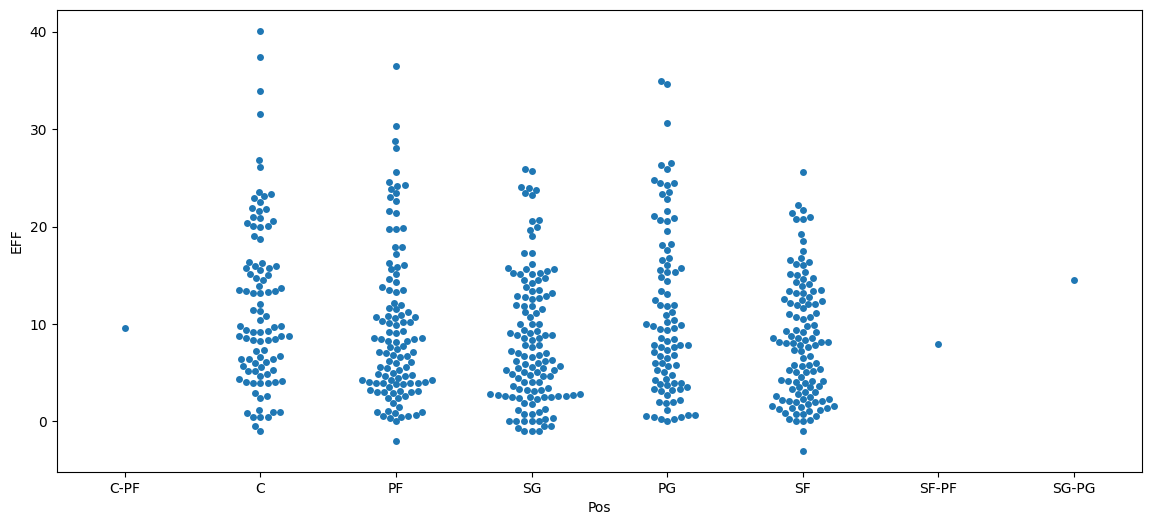

In [27]:
plt.figure(figsize=(14,6))
sns.swarmplot(
    x=players["Pos"],
    y=players["EFF"]
)

#As we can see

In [36]:
ages = players.Age.describe().round(decimals=1) # used to specify the first 25%, defining what is a young player
points = players.PTS.describe().round(decimals=1)
eff = players.EFF.describe().round(decimals=1)

print(ages,'\n\n',points,'\n\n',eff)

count    546.0
mean      25.9
std        4.4
min       19.0
25%       23.0
50%       25.0
75%       28.8
max       39.0
Name: Age, dtype: float64 

 count    546.0
mean       8.4
std        7.1
min        0.0
25%        2.8
50%        6.3
75%       12.5
max       34.6
Name: PTS, dtype: float64 

 count    546.0
mean       9.8
std        7.6
min       -3.0
25%        3.9
50%        8.4
75%       14.5
max       40.1
Name: EFF, dtype: float64


<Axes: ylabel='EFF'>

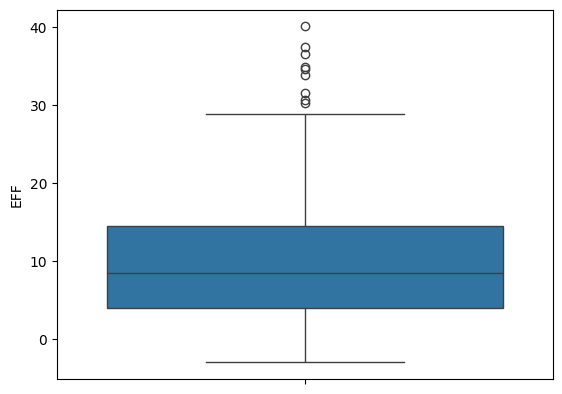

In [38]:
sns.boxplot(data=players, y="EFF")

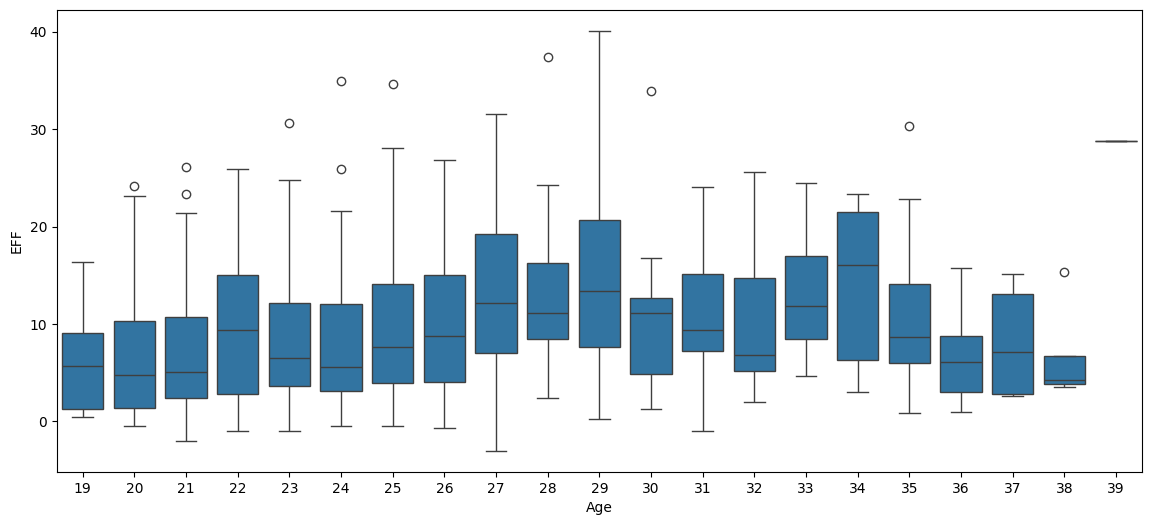

In [39]:
plt.figure(figsize=(14,6))
sns.boxplot(data=players, x="Age", y="EFF");

With the graph below, we can see that within <23y (what we have defined to be a young age), if we have more than 15 points we are special. Those data will then be used to filter the current base player and keep only special ones.

In [44]:
young_age = ages["25%"]
futur_super_star_def = f"(EFF >= 15) & (PTS >= 15) & (Age <= {young_age})"
players.query(futur_super_star_def).sort_values(["Age", "EFF"], ascending=[True,False])

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
515,492,Victor Wembanyama,PF,20,SAS,32,32,28.9,7.1,15.8,...,2.1,8.1,10.2,3.1,1.2,3.2,3.1,2.3,19.2,24.2
437,418,Alperen ?engün,C,21,HOU,36,36,32.3,8.5,15.8,...,2.6,6.4,9.0,5.0,1.2,0.7,2.5,3.4,21.6,26.1
214,203,Chet Holmgren,C,21,OKC,36,36,30.1,6.7,12.1,...,1.5,5.9,7.4,2.7,0.6,2.6,1.8,2.7,17.9,23.3
27,24,Paolo Banchero,PF,21,ORL,37,37,35.0,8.1,17.7,...,1.2,5.9,7.1,4.8,1.1,0.6,3.3,2.2,22.9,21.4
32,29,Scottie Barnes,SG,22,TOR,38,38,35.1,7.7,16.0,...,2.3,6.2,8.6,5.7,1.4,1.4,2.4,2.1,20.4,25.9
25,22,LaMelo Ball,PG,22,CHO,15,15,33.4,8.8,19.9,...,1.5,3.9,5.5,8.2,1.4,0.3,3.9,3.5,24.7,24.5
337,322,Evan Mobley,PF,22,CLE,21,21,33.6,6.8,11.8,...,2.7,7.8,10.5,2.9,0.8,1.7,2.3,2.9,16.0,23.9
137,128,Anthony Edwards,SG,22,MIN,34,34,34.8,9.1,19.7,...,0.7,4.6,5.4,4.9,1.3,0.6,3.5,1.9,26.3,23.4
242,231,Jalen Johnson,SF,22,ATL,22,19,31.3,6.1,10.4,...,1.4,7.2,8.5,3.0,1.1,0.9,1.9,2.4,15.4,22.2
502,479,Franz Wagner,SF,22,ORL,34,34,33.4,7.7,16.5,...,1.1,4.8,5.9,3.9,1.1,0.4,1.9,2.3,20.9,20.8


### Age and more

<Axes: xlabel='count', ylabel='Pos'>

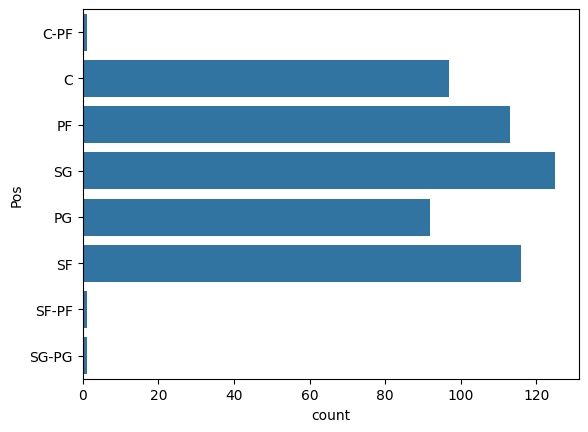

In [45]:
sns.countplot(players['Pos'],label="Count")

### True Shot percentage

In [49]:
#The True Shot Percentage will be calculated as follows: 
players['TS%'] = np.where((2 * (players['FGA'] + 0.44 * players['FTA'])) != 0, players['PTS'] / (2 * (players['FGA'] + 0.44 * players['FTA'])), 0)

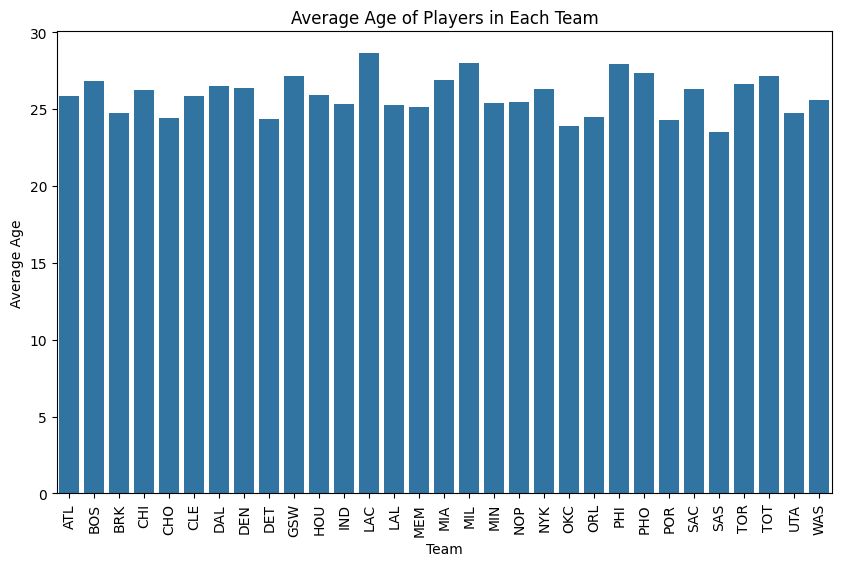

In [50]:
average_age_per_team = players.groupby('Tm')['Age'].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=average_age_per_team.index, y=average_age_per_team.values)
plt.title('Average Age of Players in Each Team')
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Average Age')
plt.show()

In [51]:
players.Pos.value_counts()

Pos
SG       125
SF       116
PF       113
C         97
PG        92
C-PF       1
SF-PF      1
SG-PG      1
Name: count, dtype: int64

In [52]:
players["position"] = players.Pos.map({"PG": "Backcourt", "SG": "Backcourt", "SF": "Wing", "SF-PF": "Wing", "PF": "Big", "C": "Big", })

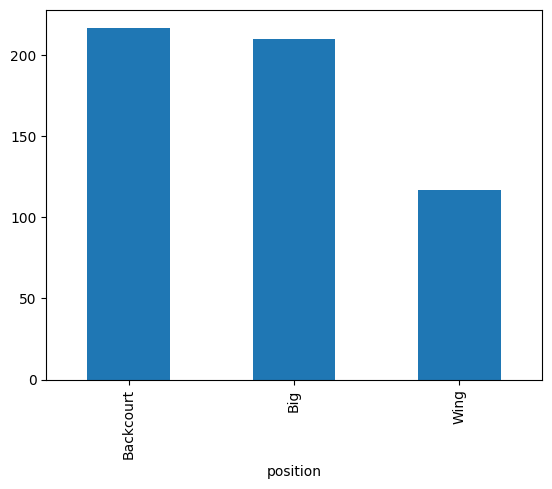

In [60]:
players.position.value_counts().plot(kind='bar')
players.drop(columns=['position'], inplace=True)

Normalize and run a base model

In [61]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [77]:

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']),
        ('cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Pos', 'Tm'])
    ])
# Define model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])


In [78]:
# Split data into training and test sets
X = players.drop(['Player', 'PTS', 'FG%'], axis=1)
y_pts = players['PTS']
y_fg = players['FG%']
X_train_pts, X_test_pts, y_train_pts, y_test_pts = train_test_split(X, y_pts, test_size=0.2, random_state=42)
X_train_fg, X_test_fg, y_train_fg, y_test_fg = train_test_split(X, y_fg, test_size=0.2, random_state=42)


In [79]:
# Train model to predict PTS
model.fit(X_train_pts, y_train_pts)

pts_preds = model.predict(X_test_pts)
print(f'RMSE for PTS prediction: {mean_squared_error(y_test_pts, pts_preds, squared=False)}')



c:\Users\noahg\PycharmProjects\mlops-nba\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RMSE for PTS prediction: 0.853914941474109


In [80]:
# Train model to predict FG%
model.fit(X_train_fg, y_train_fg)

fg_preds = model.predict(X_test_fg)
print(f'RMSE for FG% prediction: {mean_squared_error(y_test_fg, fg_preds, squared=False)}')

c:\Users\noahg\PycharmProjects\mlops-nba\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RMSE for FG% prediction: 0.061721618284328574
